1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Closeness between values : [ True  True  True]
Closeness between Vectors : [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
Component 0 selected. Total variability : 0.9365418316699954
Component 1 selected. Total variability : 1.865004940458695e-17
Component 2 selected. Total variability : 0.06345816833000462


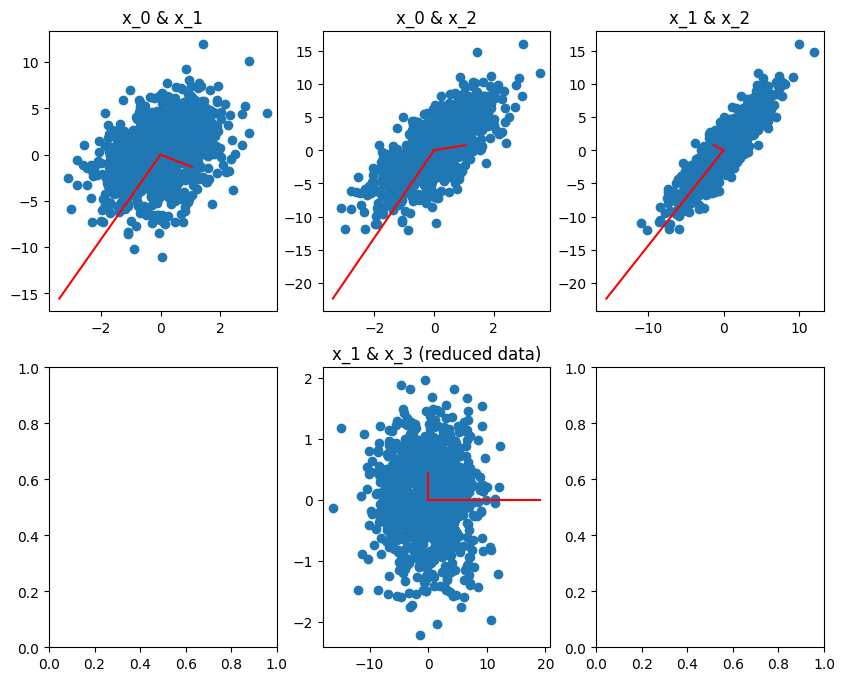

In [62]:
import numpy as np
from scipy import linalg
from scipy.linalg import svd
from matplotlib import pyplot as plt

N = 1000

# Generate dataset
x_1 = np.random.normal(0,1,N)
x_2 = x_1 + np.random.normal(0,3,N)
x_3 = 2*x_1 + x_2
data = np.array([x_1,x_2,x_3])
# print("Data :",data)

# Find eigenvectors and eigenvalues

## Eigendecomposition
covMatrix = np.cov(data)
valuesDecomp,vectorsDecomp = linalg.eig(covMatrix)
valuesDecomp = np.real_if_close(valuesDecomp) # imaginary parts can appears

## SVD
U, S, Vt = svd(data)
valuesSVD = S**2/(N-1)
vectorsSVD = U

## Check
### Values
# print("Values from decomp :",np.sort(valuesDecomp))
# print("Values from SVD :",np.sort(valuesSVD))
print("Closeness between values :",np.isclose(np.sort(valuesDecomp),np.sort(valuesSVD),rtol=0.01))
# Values are quite close
### Vectors
# print("Vectors from decomp :",np.sort(vectorsDecomp))
# print("Vectors from SVD :",np.sort(vectorsSVD))
print("Closeness between Vectors :",np.isclose(np.sort(vectorsDecomp),np.sort(vectorsSVD),rtol=0.01))
# Vectors are quite close

# Variability
lambdaValues = np.diag(valuesDecomp)
for i in range(3):
    print("Component",i,"selected. Total variability :",lambdaValues[i, i]/lambdaValues.trace())

# We need to remove component 1 to keep at least 99% of the total variability.
# Indeed, the component 1 retains 0% of the total variability.
# Keeping the first two components retains 100% of the variability and we have dim. reduction from 3 to 2.
# x_3 linear combinaison of x_1 and x_2 -> no need to keep x_1 or x_2.
# It makes sense to keep x_1 and x_3 to to keep information about x_1, x_2 and x_3.

# Redefine
dataReduction = np.array([x_1,x_3])
UReduction, SReduction, VtReduction = svd(dataReduction)
valuesReduction = SReduction**2/(N-1)
vectorsReduction = UReduction

# New basis
dataRedef = np.dot(vectorsReduction.T,dataReduction)

# Plot
scaleFactor = 1
figure, axs = plt.subplots(nrows=2,ncols=3,figsize=(10,8))

axs[0,0].scatter(data[0,:],data[1,:])
axs[0,0].set_title("x_0 & x_1")
axs[0,1].scatter(data[0,:],data[2,:])
axs[0,1].set_title("x_0 & x_2")
axs[0,2].scatter(data[1,:],data[2,:])
axs[0,2].set_title("x_1 & x_2")

axs[1,1].scatter(dataRedef[0,:],dataRedef[1,:])
axs[1,1].set_title("x_1 & x_3 (reduced data)")

for value,vector in zip(valuesDecomp,vectorsDecomp.T):
    axs[0,0].plot([0, scaleFactor * value * vector[0]], [0, scaleFactor * value * vector[1]], 'r')
    axs[0,1].plot([0, scaleFactor * value * vector[0]], [0, scaleFactor * value * vector[2]], 'r')
    axs[0,2].plot([0, scaleFactor * value * vector[1]], [0, scaleFactor * value * vector[2]], 'r')

for value,vector in zip(valuesReduction,np.dot(vectorsReduction.T,vectorsReduction)):
    axs[1,1].plot([0, scaleFactor*value*vector[0]], [0, scaleFactor*value*vector[1]], 'r')

# There are no plot en [1,0] and [1,2] as we kept only x_1 and x_3 for the dataReduction, so we can't project x_2 or on x_2

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

[[ 1.44912958  0.67804348  0.37058533 ...  0.24723985 -1.00872046
   0.75367509]
 [ 0.92114532 -1.28160772  2.23976553 ...  4.50914142 -1.61374473
  -2.20029979]
 [ 3.78325893 -0.24717929  2.97187151 ...  5.0620538  -3.75410373
  -0.83126653]]
Component 0 selected. Total variability : 0.9277802325225271
Component 1 selected. Total variability : -3.37164056907916e-17
Component 2 selected. Total variability : 0.07221976747747293


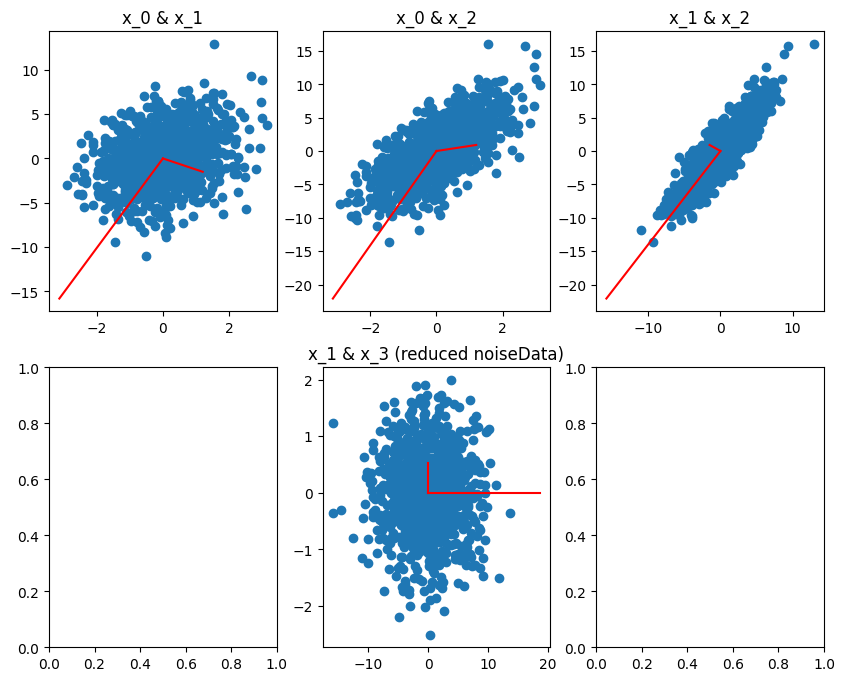

In [61]:
noise = np.random.normal(0,1/20,(3,N,10))
noiseData = data + np.sum(noise,axis=2)
print(noiseData)

noiseCovMatrix = np.cov(noiseData)
valuesNoise, vectorsNoise = linalg.eig(noiseCovMatrix)
valuesNoise = np.real_if_close(valuesNoise)

lambdaValuesNoise = np.diag(valuesDecomp)
for i in range(3):
    print("Component",i,"selected. Total variability :",lambdaValuesNoise[i, i]/lambdaValuesNoise.trace())
# We keep x_1 and x_3

noiseDataReduction = np.array([noiseData[0],noiseData[2]])
UNoiseReduction, SNoiseReduction, VtNoiseReduction = svd(noiseDataReduction)
valuesNoiseReduction = SNoiseReduction**2/(N-1)
vectorsNoiseReduction = UNoiseReduction

noiseDataRedef = np.dot(vectorsReduction.T,dataReduction)
scaleFactor = 1
figure, axs = plt.subplots(nrows=2,ncols=3,figsize=(10,8))

axs[0,0].scatter(noiseData[0,:],noiseData[1,:])
axs[0,0].set_title("x_0 & x_1")
axs[0,1].scatter(noiseData[0,:],noiseData[2,:])
axs[0,1].set_title("x_0 & x_2")
axs[0,2].scatter(noiseData[1,:],noiseData[2,:])
axs[0,2].set_title("x_1 & x_2")

axs[1,1].scatter(noiseDataRedef[0,:],noiseDataRedef[1,:])
axs[1,1].set_title("x_1 & x_3 (reduced noiseData)")

for value,vector in zip(valuesDecomp,vectorsDecomp.T):
    axs[0,0].plot([0, scaleFactor * value * vector[0]], [0, scaleFactor * value * vector[1]], 'r')
    axs[0,1].plot([0, scaleFactor * value * vector[0]], [0, scaleFactor * value * vector[2]], 'r')
    axs[0,2].plot([0, scaleFactor * value * vector[1]], [0, scaleFactor * value * vector[2]], 'r')

for value,vector in zip(valuesReduction,np.dot(vectorsReduction.T,vectorsReduction)):
    axs[1,1].plot([0, scaleFactor*value*vector[0]], [0, scaleFactor*value*vector[1]], 'r')

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 